In [ ]:
!pip install ucimlrepo
!pip install scikit-learn

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
#list_available_datasets()

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.concat([X, y], axis=1)
dataset[0:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [ ]:
dataset.shape

(303, 14)


```
3 age: age in years
4 sex: sex (1 = male; 0 = female)
9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the
        hospital)
12 chol: serum cholestoral in mg/dl
16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
32 thalach: maximum heart rate achieved
38 exang: exercise induced angina (1 = yes; 0 = no)
40 oldpeak = ST depression induced by exercise relative to rest
41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
44 ca: number of major vessels (0-3) colored by flourosopy
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
```

Is the set balanced in terms of the number of samples per class?

<Axes: >

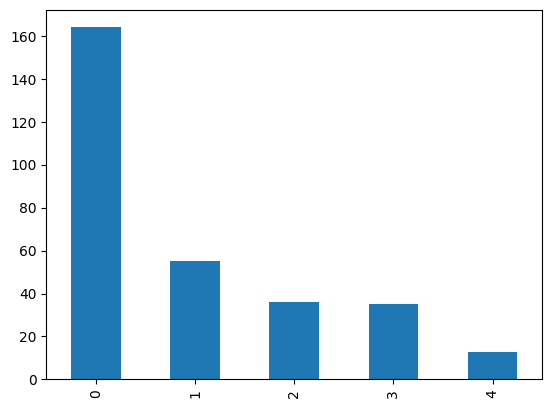

In [ ]:
dataset['num'].value_counts().plot.bar()

What are the means and deviations of numerical features?

In [ ]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[num_features].head(10)

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
5,56,120,236,178,0.8
6,62,140,268,160,3.6
7,57,120,354,163,0.6
8,63,130,254,147,1.4
9,53,140,203,155,3.1


In [ ]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[num_features].describe().loc[['mean', 'std']]

,age,trestbps,chol,thalach,oldpeak
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075


For numerical features: Is their distribution approximately normal?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

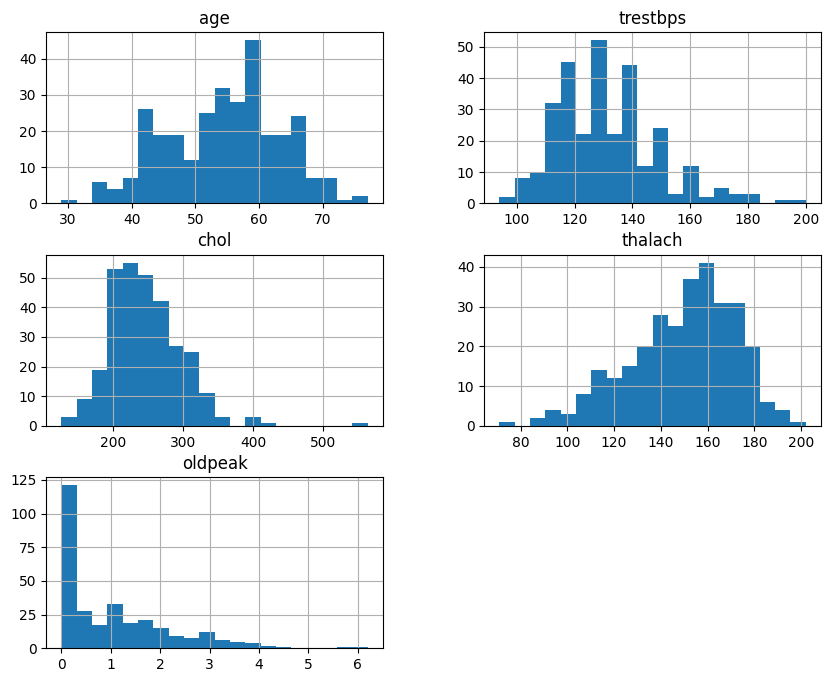

In [ ]:
dataset[num_features].hist(figsize=(10, 8), bins=20)

For categorical features: Is the distribution approximately uniform?

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: >]], dtype=object)

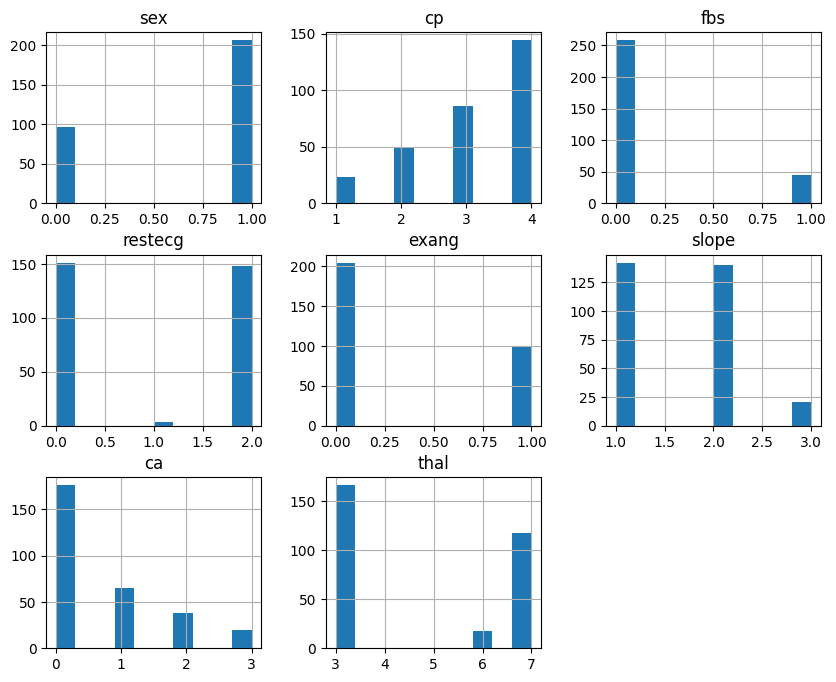

In [ ]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset[cat_features].hist(figsize=(10, 8))

Are there missing features and what strategy can we use to replace them?

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [ ]:
ca_median = dataset['ca'].median()
ca_median

0.0

In [ ]:
thal_mode = dataset['thal'].mode()[0]
thal_mode

3.0

In [ ]:
dataset['ca'].fillna(ca_median, inplace=True)
dataset['thal'].fillna(thal_mode, inplace=True)

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Transform the data into a matrix of numerical features (examples x features).



```
9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic

19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
                    
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
```



In [ ]:
mapped_column_names = {'cp_1': 'cp_typical_angina', 'cp_2': 'cp_atypical_angina', 'cp_3': 'cp_non_anginal_pain', 'cp_4': 'cp_asymptomatic',
                       'restecg_0': 'restecg_normal', 'restecg_1': 'restecg_wave_abnormality', 'restecg_2': 'restecg_definite_lvh',
                       'thal_3': 'thal_normal', 'thal_6': 'thal_fixed', 'thal_7': 'thal_reversable',
                       'slope_1': 'slope_upsloping', 'slope_2': 'slope_flat', 'slope_3': 'slope_downsloping'}

In [ ]:
column_names = ['cp', 'restecg', 'thal', 'slope']
dataset[column_names] = dataset[column_names].astype('int64')
dataset_encoded = pd.get_dummies(dataset, columns=column_names)
dataset_encoded.rename(columns=mapped_column_names, inplace=True)

In [ ]:
dataset_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_asymptomatic,restecg_normal,restecg_wave_abnormality,restecg_definite_lvh,thal_normal,thal_fixed,thal_reversable,slope_upsloping,slope_flat,slope_downsloping
0,63,1,145,233,1,150,0,2.3,0.0,0,...,0,0,0,1,0,1,0,0,0,1
1,67,1,160,286,0,108,1,1.5,3.0,2,...,1,0,0,1,1,0,0,0,1,0
2,67,1,120,229,0,129,1,2.6,2.0,1,...,1,0,0,1,0,0,1,0,1,0
3,37,1,130,250,0,187,0,3.5,0.0,0,...,0,1,0,0,1,0,0,0,0,1
4,41,0,130,204,0,172,0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,0,1.2,0.0,1,...,0,1,0,0,0,0,1,0,1,0
299,68,1,144,193,1,141,0,3.4,2.0,2,...,1,1,0,0,0,0,1,0,1,0
300,57,1,130,131,0,115,1,1.2,1.0,3,...,1,1,0,0,0,0,1,0,1,0
301,57,0,130,236,0,174,0,0.0,1.0,1,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
dataset_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'num', 'cp_typical_angina', 'cp_atypical_angina',
       'cp_non_anginal_pain', 'cp_asymptomatic', 'restecg_normal',
       'restecg_wave_abnormality', 'restecg_definite_lvh', 'thal_normal',
       'thal_fixed', 'thal_reversable', 'slope_upsloping', 'slope_flat',
       'slope_downsloping'],
      dtype='object')

In [ ]:
dataset_encoded.shape

(303, 23)

In [ ]:
X = dataset_encoded.drop('num', axis=1)
y = dataset_encoded['num']

In [ ]:
y = y.replace([1, 2, 3, 4], 1)
y = y.values.reshape(-1, 1)

<h1>Logistic Regression</h1>

In [ ]:
import numpy as np

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

class LogisticRegression():
  def __init__(self, learning_rate=1e-3, max_iterations=500, batch_size=5, convergence_threshold=1e-5, random_state=0):
    self.learning_rate = learning_rate
    self.max_iterations = max_iterations
    self.batch_size = batch_size
    self.convergence_threshold = convergence_threshold
    self.random_state = random_state
    self.cost_list = []
    self.theta = None

  def loss(self, y, pred):
    return -(y * np.log(pred) + (1 - y) * np.log(1 - pred))

  def fit(self, X, y):
    self.theta = np.zeros(X.shape[1] + 1)
    X_bias = np.c_[np.ones(X.shape[0]), X]
    np.random.seed(self.random_state)
    for epoch in range(self.max_iterations):
      loss_batch = []
      for i in range(0, len(y), self.batch_size):
        X_batch = X_bias[i:i + self.batch_size]
        y_batch = y[i:i + self.batch_size]
        preds = sigmoid(X_batch.dot(self.theta))
        gradient = X_batch.T.dot(preds - y_batch) / len(y_batch)
        self.theta -= self.learning_rate * gradient
        loss_batch.append(np.mean(self.loss(y_batch, preds)))

      cost = np.mean(loss_batch)
      if (len(self.cost_list) > 0 and abs(cost - self.cost_list[-1]) < self.convergence_threshold):
        break
      self.cost_list.append(cost)

  def predict(self, X):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    preds = sigmoid(X_bias.dot(self.theta))
    y_preds = [1 if pred > 0.5 else 0 for pred in preds]
    return y_preds

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(learning_rate=2e-3, max_iterations=1000, batch_size=5, convergence_threshold=1e-5, random_state=42)
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Recall: %.2f" % recall_score(y_test, y_preds))
print("Precision: %.2f" % precision_score(y_test, y_preds))
print("F1: %.2f" % f1_score(y_test, y_preds))
print("Accuracy: %.2f" % accuracy_score(y_test, y_preds))

In [ ]:
import matplotlib.pyplot as plt
n = len(model.cost_list)
plt.plot(range(n), model.cost_list, label="Train cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show

<h1>MLP implementation</h1>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
class MLP():
  def __init__(self, hidden_layers, batch_size=50, learning_rate=1e-3, stand_dev=1.0, max_iter=500, random_state=42):
    self.hidden_layers = hidden_layers
    self.num_layers = len(hidden_layers) + 1
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    self.stand_dev = stand_dev
    self.max_iter = max_iter
    self.random_state = random_state
    self.train_cost_list = []
    self.test_cost_list = []

  def wandb_init(self, input_size, output_size):
    self.input_size = input_size
    self.output_size = output_size
    np.random.seed(self.random_state)
    self.weights = [np.random.normal(0, self.stand_dev, (input_size, self.hidden_layers[0]))]
    self.bias = [np.random.normal(0, self.stand_dev, ((1, self.hidden_layers[0])))]

    for i in range(self.num_layers - 2):
      self.weights.append(np.random.normal(0, self.stand_dev, (self.hidden_layers[i], self.hidden_layers[i + 1])))
      self.bias.append(np.random.normal(0, self.stand_dev, ((1, self.hidden_layers[i + 1]))))

    self.weights.append(np.random.normal(0, self.stand_dev, (self.hidden_layers[-1], output_size)))
    self.bias.append(np.random.normal(0, self.stand_dev, ((1, output_size))))

  def sigmoid(self, x):
    x = np.array(x, dtype=np.float128)
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self, y):
    return y * (1 - y)

  def loss(self, y, pred):
    return -np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred), axis=1)

  def feedforward(self, X):
    layer_outputs = [X]
    for i in range(self.num_layers):
      z = np.dot(layer_outputs[-1], self.weights[i]) + self.bias[i]
      a = self.sigmoid(z)
      layer_outputs.append(a)
    return layer_outputs

  def backward(self, y, layer_outputs):
    deltas = [None] * self.num_layers

    error = y - layer_outputs[-1]

    deltas[-1] = error * self.sigmoid_derivative(layer_outputs[-1])

    for i in range(self.num_layers - 2, -1, -1):
        deltas[i] = deltas[i + 1].dot(self.weights[i + 1].T) * self.sigmoid_derivative(layer_outputs[i + 1])

    for i in range(self.num_layers - 1, -1, -1):
      self.weights[i] += self.learning_rate * np.dot(layer_outputs[i].T, deltas[i])
      self.bias[i] += self.learning_rate * np.sum(deltas[i])

  def fit(self, X, y, X_test, y_test):
    self.wandb_init(X.shape[1], 1)
    if self.batch_size == None:
      self.batch_size = X.shape[1]
    for epoch in range(self.max_iter):
      X, y = shuffle(X, y, random_state=self.random_state)

      train_loss_batch = []
      for i in range(0, len(y), self.batch_size):
        X_batch = X[i:i + self.batch_size]
        y_batch = y[i:i + self.batch_size]

        layer_outputs = self.feedforward(X_batch)
        self.backward(y_batch, layer_outputs)

        train_loss_batch.append(np.mean(self.loss(y_batch, layer_outputs[-1])))

      self.train_cost_list.append(np.mean(train_loss_batch))
      self.test_cost_list.append(np.mean(self.loss(y_test, self.feedforward(X_test)[-1])))

  def predict(self, X):
    outputs = self.feedforward(X)[-1]
    y_preds = [1 if pred > 0.5 else 0 for pred in outputs]
    return y_preds

  def get_metrics(self, X, y):
    preds = self.predict(X)
    print("Recall: %.2f" % recall_score(y, preds))
    print("Precision: %.2f" % precision_score(y, preds))
    print("F1: %.2f" % f1_score(y, preds))
    print("Accuracy: %.2f" % accuracy_score(y, preds))

In [ ]:
X_normalized = X.copy()
X_normalized[num_features] = (X[num_features] - X[num_features].min()) / (X[num_features].max() - X[num_features].min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
X_train_non_norm, X_test_non_norm, y_train_non_norm, y_test_non_norm = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
default_conf = {
  "max_iter": 1000,
  "learning_rate": 10e-4,
  "stand_dev": 1.0,
  "batch_size": 50,
  "random_state": 42,
  "hidden_layers": [15, 15]
}

# Hidden layer dimensions configs
hld_config1 = {
  **default_conf,
  "hidden_layers": [8, 15]
}
hld_config2 = {
  **default_conf,
  "hidden_layers": [2, 2]
}
hld_config3 = {
  **default_conf,
  "hidden_layers": [30, 30]
}

#Learning rates configs
lr_config1 = {
  **default_conf,
  "learning_rate": 0.1
}
lr_config2 = {
  **default_conf,
  "learning_rate": 10e-4
}
lr_config3 = {
  **default_conf,
  "learning_rate": 10e-5
}

#Standard deviations configs
sd_config1 = {
    **default_conf,
    "stand_dev": 0.1
}
sd_config2 = {
    **default_conf,
    "stand_dev": 1.0
}
sd_config3 = {
    **default_conf,
    "stand_dev": 10.0
}

#Number of layers configs
nol_config1 = {
    **default_conf,
    "hidden_layers": [15]
}
nol_config2 = {
    **default_conf,
    "hidden_layers": [15, 15]
}
nol_config3 = {
    **default_conf,
    "hidden_layers": [15, 15, 15, 15]
}

In [ ]:
def plot_costs(model, title, axis, pos):
  n = len(model.train_cost_list)
  axis[pos].plot(range(n), model.train_cost_list, label="Train cost")
  axis[pos].plot(range(n), model.test_cost_list, label="Test cost")
  axis[pos].set_title(title)
  axis[pos].set_xlabel("Epochs")
  if (pos == 0):
    axis[pos].set_ylabel("Loss")
  axis[pos].legend()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Hidden layer dimension: [8, 15]
Recall: 0.94
Precision: 0.91
F1: 0.92
Accuracy: 0.92
/////////////////////////
Hidden layer dimension: [2, 2]
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
Hidden layer dimension: [30, 30]
Recall: 0.81
Precision: 0.93
F1: 0.87
Accuracy: 0.87
/////////////////////////


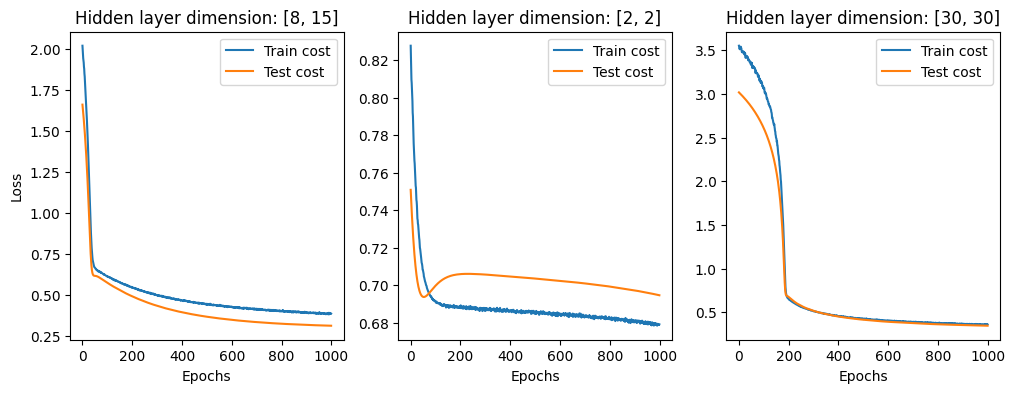

In [ ]:
# Hidden layer dimensions experiments
model1 = MLP(**hld_config1)
model2 = MLP(**hld_config2)
model3 = MLP(**hld_config3)

model1.fit(X_train, y_train, X_test, y_test)
model2.fit(X_train, y_train, X_test, y_test)
model3.fit(X_train, y_train, X_test, y_test)

title1 = "Hidden layer dimension: " + str(hld_config1["hidden_layers"])
print(title1)
model1.get_metrics(X_test, y_test)
print("/////////////////////////")

title2 = "Hidden layer dimension: " + str(hld_config2["hidden_layers"])
print(title2)
model2.get_metrics(X_test, y_test)
print("/////////////////////////")

title3 = "Hidden layer dimension: " + str(hld_config3["hidden_layers"])
print(title3)
model3.get_metrics(X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(model1, title1, axis, 0)
plot_costs(model2, title2, axis, 1)
plot_costs(model3, title3, axis, 2)

plt.show()

Learning rate: 0.1
Recall: 0.78
Precision: 0.83
F1: 0.81
Accuracy: 0.80
/////////////////////////
Learning rate: 0.001
Recall: 0.91
Precision: 0.91
F1: 0.91
Accuracy: 0.90
/////////////////////////
Learning rate: 0.0001
Recall: 0.50
Precision: 0.73
F1: 0.59
Accuracy: 0.64
/////////////////////////


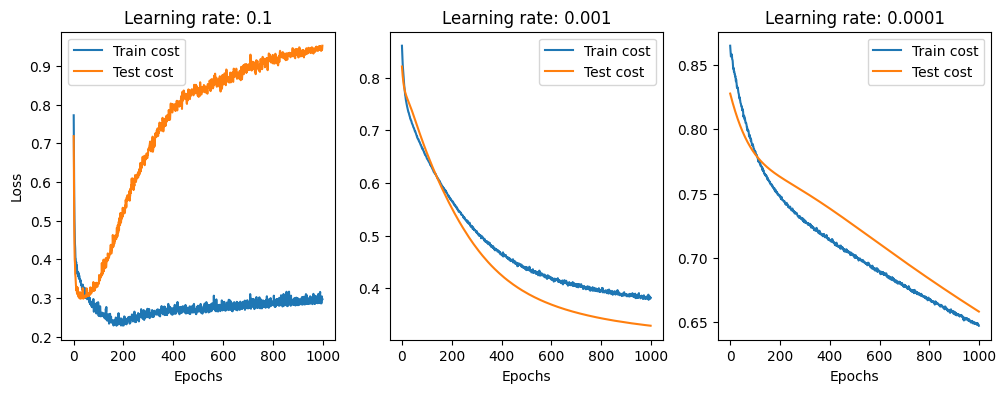

In [ ]:
# Learning rates experiments
model1 = MLP(**lr_config1)
model2 = MLP(**lr_config2)
model3 = MLP(**lr_config3)

model1.fit(X_train, y_train, X_test, y_test)
model2.fit(X_train, y_train, X_test, y_test)
model3.fit(X_train, y_train, X_test, y_test)

title1 = "Learning rate: " + str(lr_config1["learning_rate"])
print(title1)
model1.get_metrics(X_test, y_test)
print("/////////////////////////")

title2 = "Learning rate: " + str(lr_config2["learning_rate"])
print(title2)
model2.get_metrics(X_test, y_test)
print("/////////////////////////")

title3 = "Learning rate: " + str(lr_config3["learning_rate"])
print(title3)
model3.get_metrics(X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(model1, title1, axis, 0)
plot_costs(model2, title2, axis, 1)
plot_costs(model3, title3, axis, 2)

plt.show()

Standard deviation: 0.1
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
Standard deviation: 1.0
Recall: 0.91
Precision: 0.91
F1: 0.91
Accuracy: 0.90
/////////////////////////
Standard deviation: 10.0
Recall: 0.88
Precision: 0.56
F1: 0.68
Accuracy: 0.57
/////////////////////////


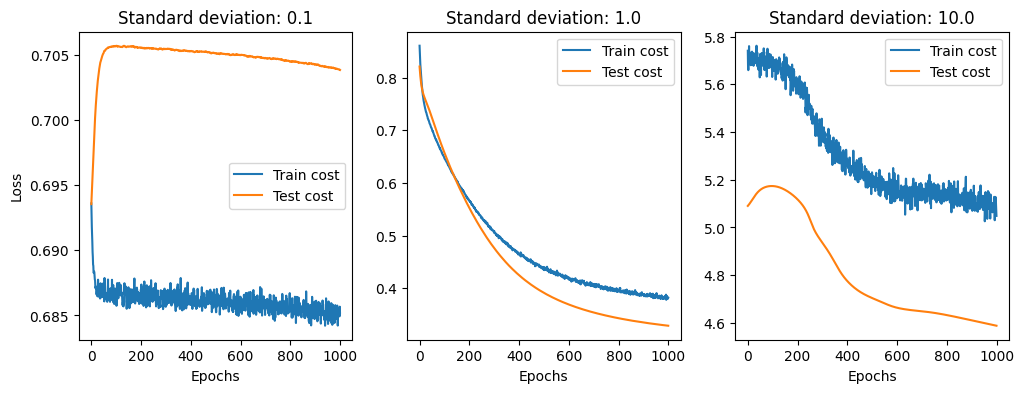

In [ ]:
#Standard deviations experiments
model1 = MLP(**sd_config1)
model2 = MLP(**sd_config2)
model3 = MLP(**sd_config3)

model1.fit(X_train, y_train, X_test, y_test)
model2.fit(X_train, y_train, X_test, y_test)
model3.fit(X_train, y_train, X_test, y_test)

title1 = "Standard deviation: " + str(sd_config1["stand_dev"])
print(title1)
model1.get_metrics(X_test, y_test)
print("/////////////////////////")

title2 = "Standard deviation: " + str(sd_config2["stand_dev"])
print(title2)
model2.get_metrics(X_test, y_test)
print("/////////////////////////")

title3 = "Standard deviation: " + str(sd_config3["stand_dev"])
print(title3)
model3.get_metrics(X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(model1, title1, axis, 0)
plot_costs(model2, title2, axis, 1)
plot_costs(model3, title3, axis, 2)

plt.show()

Normalized data
Recall: 0.91
Precision: 0.91
F1: 0.91
Accuracy: 0.90
/////////////////////////
Non-normalized data
Recall: 0.69
Precision: 0.55
F1: 0.61
Accuracy: 0.54


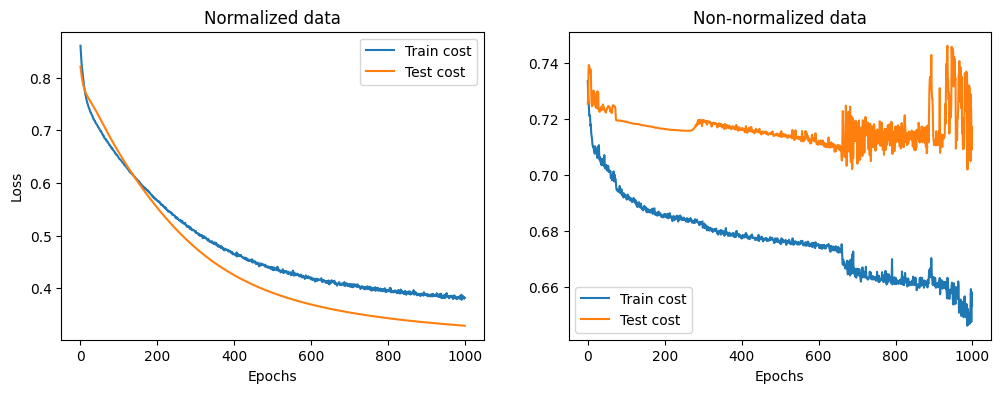

In [ ]:
# Data normalization experiments
model1 = MLP(**default_conf)
model2 = MLP(**default_conf)

model1.fit(X_train, y_train, X_test, y_test)
model2.fit(X_train_non_norm, y_train_non_norm, X_test_non_norm, y_test_non_norm)

title1 = "Normalized data"
print(title1)
model1.get_metrics(X_test, y_test)
print("/////////////////////////")

title2 = "Non-normalized data"
print(title2)
model2.get_metrics(X_test_non_norm, y_test_non_norm)

figure, axis = plt.subplots(1, 2, figsize=(12, 4))

plot_costs(model1, title1, axis, 0)
plot_costs(model2, title2, axis, 1)

plt.show()

Hidden layer sizes: [15]
Recall: 0.84
Precision: 0.90
F1: 0.87
Accuracy: 0.87
/////////////////////////
Hidden layer sizes: [15, 15]
Recall: 0.91
Precision: 0.91
F1: 0.91
Accuracy: 0.90
/////////////////////////
Hidden layer sizes: [15, 15, 15, 15]
Recall: 0.94
Precision: 0.91
F1: 0.92
Accuracy: 0.92
/////////////////////////


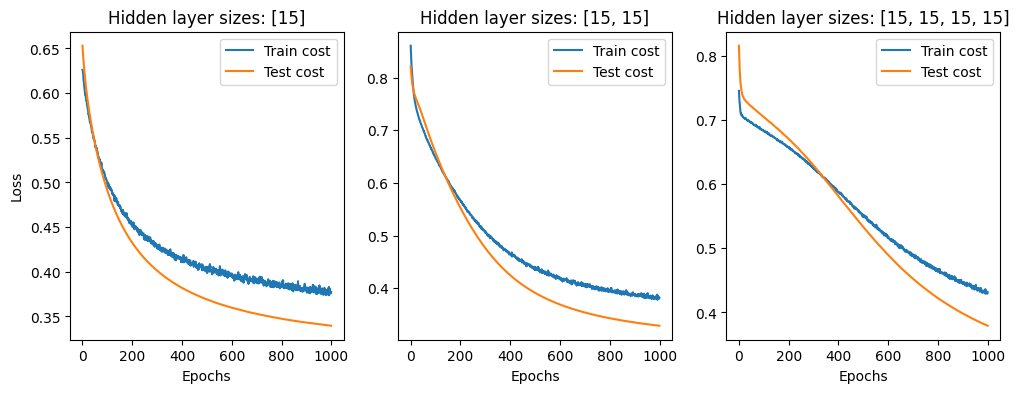

In [ ]:
# Number of layers experiments
model1 = MLP(**nol_config1)
model2 = MLP(**nol_config2)
model3 = MLP(**nol_config3)

model1.fit(X_train, y_train, X_test, y_test)
model2.fit(X_train, y_train, X_test, y_test)
model3.fit(X_train, y_train, X_test, y_test)

title1 = "Hidden layer sizes: " + str(nol_config1["hidden_layers"])
print(title1)
model1.get_metrics(X_test, y_test)
print("/////////////////////////")

title2 = "Hidden layer sizes: " + str(nol_config2["hidden_layers"])
print(title2)
model2.get_metrics(X_test, y_test)
print("/////////////////////////")

title3 = "Hidden layer sizes: " + str(nol_config3["hidden_layers"])
print(title3)
model3.get_metrics(X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(model1, title1, axis, 0)
plot_costs(model2, title2, axis, 1)
plot_costs(model3, title3, axis, 2)

plt.show()

<h1>Training with PyTorch</h1>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import time

np.random.seed(42)

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_size, hidden_sizes, output_size):
    torch.manual_seed(42)
    super(MLP, self).__init__()
    self.input_layer = nn.Linear(input_size, hidden_sizes[0])

    self.hidden_layers = nn.ModuleList()
    for i in range(len(hidden_sizes) - 1):
      self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))

    self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
    X = self.sigmoid(self.input_layer(X))

    for hidden_layer in self.hidden_layers:
      X = self.sigmoid(hidden_layer(X))

    X = self.sigmoid(self.output_layer(X))
    return X

def train_one_epoch(model, optimizer, loss_fn, data_loader):
  train_loss = 0.0
  for (index, batch) in enumerate(data_loader):
    X, y = batch
    optimizer.zero_grad()
    outputs = model.forward(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  avg_loss = train_loss / len(data_loader)
  return avg_loss

def train(model, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test):
  train_loss_list = []
  test_loss_list = []
  train_data_loader = DataLoader(TensorDataset(torch.tensor(X_train.values).float(), torch.tensor(y_train).float()), batch_size=batch_size, shuffle=True)
  test_data_loader = DataLoader(TensorDataset(torch.tensor(X_train.values).float(), torch.tensor(y_train).float()), batch_size=batch_size, shuffle=True)

  for i in range(num_epochs):
    loss = train_one_epoch(model, optimizer, loss_fn, train_data_loader)
    train_loss_list.append(loss)

    with torch.no_grad():
      outputs = model(torch.tensor(X_test.values).float())
      test_loss = loss_fn(outputs.squeeze(), torch.tensor(y_test).float().squeeze())
      test_loss_list.append(test_loss)

  return train_loss_list, test_loss_list

def get_metrics(model, X, y):
  with torch.no_grad():
    preds = model(torch.tensor(X.values).float())
    preds = [1 if pred > 0.5 else 0 for pred in preds]
    print("Recall: %.2f" % recall_score(y, preds))
    print("Precision: %.2f" % precision_score(y, preds))
    print("F1: %.2f" % f1_score(y, preds))
    print("Accuracy: %.2f" % accuracy_score(y, preds))


In [ ]:
def plot_costs(train_cost, test_cost, title, axis, pos):
  n = len(train_cost)
  axis[pos].plot(range(n), train_cost, label="Train cost")
  axis[pos].plot(range(n), test_cost, label="Test cost")
  axis[pos].set_title(title)
  axis[pos].set_xlabel("Epochs")
  if (pos == 0):
    axis[pos].set_ylabel("Loss")
  axis[pos].legend()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_normalized = X.copy()
X_normalized[num_features] = (X[num_features] - X[num_features].min()) / (X[num_features].max() - X[num_features].min())

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
hidden_sizes = [15, 15, 15, 15]
learning_rate = 0.001
num_epochs = 1000
batch_size = 50

model_sgd = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.SGD(model_sgd.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_sgd, test_loss_sgd = train(model_sgd, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_adam = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adam(model_adam.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adam, test_loss_adam = train(model_adam, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_adagrad = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adagrad(model_adam.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adagrad, test_loss_adagrad = train(model_adagrad, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)


SGD
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
Adam
Recall: 0.81
Precision: 0.93
F1: 0.87
Accuracy: 0.87
/////////////////////////
AdaGrad
Recall: 1.00
Precision: 0.52
F1: 0.69
Accuracy: 0.52
/////////////////////////


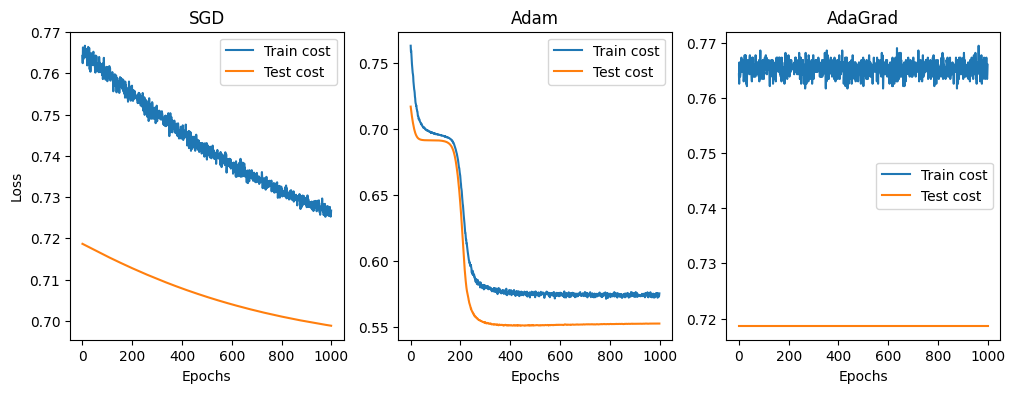

In [ ]:
title_sgd = "SGD"
print(title_sgd)
get_metrics(model_sgd, X_test, y_test)
print("/////////////////////////")

title_adam = "Adam"
print(title_adam)
get_metrics(model_adam, X_test, y_test)
print("/////////////////////////")

title_adagrad = "AdaGrad"
print(title_adagrad)
get_metrics(model_adagrad, X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(train_loss_sgd, test_loss_sgd, title_sgd, axis, 0)
plot_costs(train_loss_adam, test_loss_adam, title_adam, axis, 1)
plot_costs(train_loss_adagrad, test_loss_adagrad, title_adagrad, axis, 2)

plt.show()

In [ ]:
hidden_sizes = [15, 15, 15, 15]
learning_rate = 0.001
num_epochs = 1000
batch_size1 = 10
batch_size2 = 50
batch_size3 = 100

model_sgd1 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.SGD(model_sgd1.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
start_time = time.time()
train_loss_sgd1, test_loss_sgd1 = train(model_sgd1, optimizer, loss_fn, num_epochs, batch_size1, X_train, y_train, X_test, y_test)
end_time = time.time()
time_sgd1 = end_time - start_time

model_sgd2 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.SGD(model_sgd2.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
start_time = time.time()
train_loss_sgd2, test_loss_sgd2 = train(model_sgd2, optimizer, loss_fn, num_epochs, batch_size2, X_train, y_train, X_test, y_test)
end_time = time.time()
time_sgd2 = end_time - start_time


model_sgd3 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.SGD(model_sgd3.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
start_time = time.time()
train_loss_sgd3, test_loss_sgd3 = train(model_sgd3, optimizer, loss_fn, num_epochs, batch_size3, X_train, y_train, X_test, y_test)
end_time = time.time()
time_sgd3 = end_time - start_time

SGD, batch_size=10
Time: 32.71
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
SGD, batch_size=50
Time: 9.41
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
SGD, batch_size=100
Time: 6.16
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////


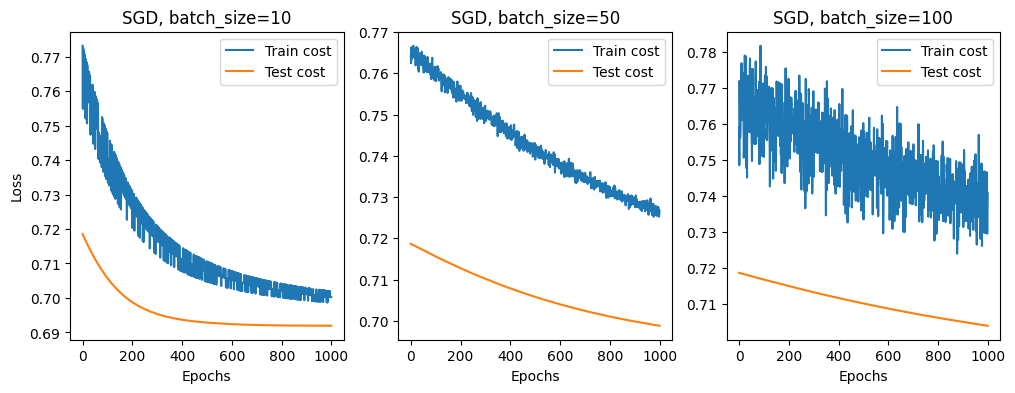

In [ ]:
title_sgd1 = "SGD, batch_size=" + str(batch_size1)
print(title_sgd1)
print("Time: %.2f" % time_sgd1)
get_metrics(model_sgd1, X_test, y_test)
print("/////////////////////////")

title_sgd2 = "SGD, batch_size=" + str(batch_size2)
print(title_sgd2)
print("Time: %.2f" % time_sgd2)
get_metrics(model_sgd2, X_test, y_test)
print("/////////////////////////")

title_sgd3 = "SGD, batch_size=" + str(batch_size3)
print(title_sgd3)
print("Time: %.2f" % time_sgd3)
get_metrics(model_sgd3, X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(train_loss_sgd1, test_loss_sgd1, title_sgd1, axis, 0)
plot_costs(train_loss_sgd2, test_loss_sgd2, title_sgd2, axis, 1)
plot_costs(train_loss_sgd3, test_loss_sgd3, title_sgd3, axis, 2)

plt.show()

In [ ]:
hidden_sizes = [15, 15, 15, 15]
learning_rate = 0.001
num_epochs = 1000
batch_size1 = 10
batch_size2 = 50
batch_size3 = 200

model_adam1 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adam(model_adam1.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adam1, test_loss_adam1 = train(model_adam1, optimizer, loss_fn, num_epochs, batch_size1, X_train, y_train, X_test, y_test)

model_adam2 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adam(model_adam2.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adam2, test_loss_adam2 = train(model_adam2, optimizer, loss_fn, num_epochs, batch_size2, X_train, y_train, X_test, y_test)

model_adam3 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adam(model_adam3.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adam3, test_loss_adam3 = train(model_adam3, optimizer, loss_fn, num_epochs, batch_size3, X_train, y_train, X_test, y_test)


Adam, batch_size=10
Recall: 0.81
Precision: 0.93
F1: 0.87
Accuracy: 0.87
/////////////////////////
Adam, batch_size=50
Recall: 0.81
Precision: 0.93
F1: 0.87
Accuracy: 0.87
/////////////////////////
Adam, batch_size=200
Recall: 0.84
Precision: 0.93
F1: 0.89
Accuracy: 0.89
/////////////////////////


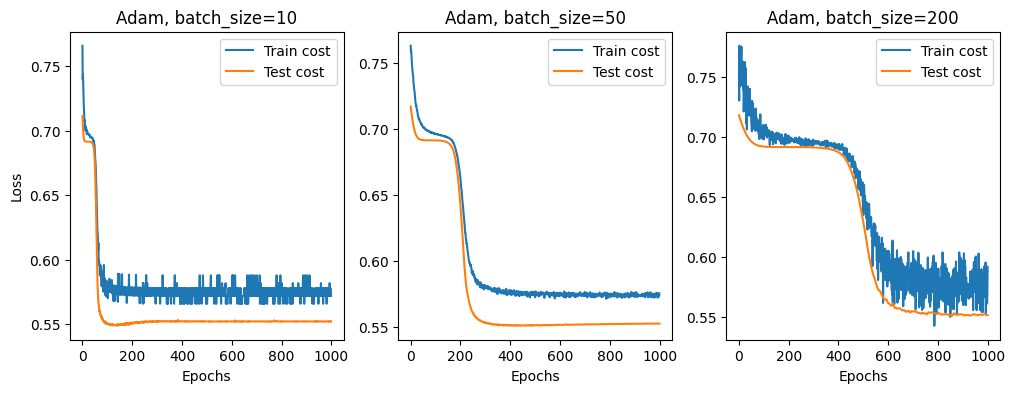

In [ ]:
title_adam1 = "Adam, batch_size=" + str(batch_size1)
print(title_adam1)
get_metrics(model_adam1, X_test, y_test)
print("/////////////////////////")

title_adam2 = "Adam, batch_size=" + str(batch_size2)
print(title_adam2)
get_metrics(model_adam2, X_test, y_test)
print("/////////////////////////")

title_adam3 = "Adam, batch_size=" + str(batch_size3)
print(title_adam3)
get_metrics(model_adam3, X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(train_loss_adam1, test_loss_adam1, title_adam1, axis, 0)
plot_costs(train_loss_adam2, test_loss_adam2, title_adam2, axis, 1)
plot_costs(train_loss_adam3, test_loss_adam3, title_adam3, axis, 2)

plt.show()

In [ ]:
hidden_sizes = [15, 15, 15, 15]
learning_rate = 0.001
num_epochs = 1000
batch_size1 = 10
batch_size2 = 50
batch_size3 = 200

model_adagrad1 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adagrad(model_adagrad1.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adagrad1, test_loss_adagrad1 = train(model_adagrad1, optimizer, loss_fn, num_epochs, batch_size1, X_train, y_train, X_test, y_test)

model_adagrad2 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adagrad(model_adagrad2.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adagrad2, test_loss_adagrad2 = train(model_adagrad2, optimizer, loss_fn, num_epochs, batch_size2, X_train, y_train, X_test, y_test)

model_adagrad3 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adagrad(model_adagrad3.parameters(), lr=learning_rate)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adagrad3, test_loss_adagrad3 = train(model_adagrad3, optimizer, loss_fn, num_epochs, batch_size3, X_train, y_train, X_test, y_test)


Adagrad, batch_size=10
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
Adagrad, batch_size=50
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
Adagrad, batch_size=200
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////


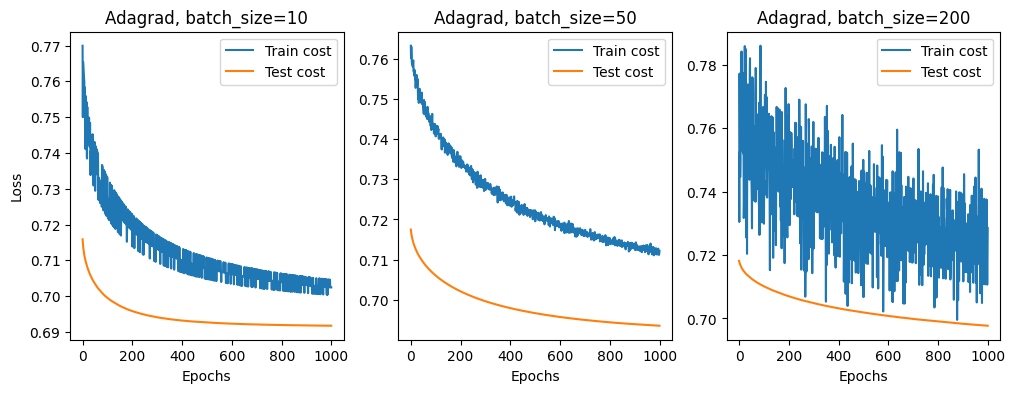

In [ ]:
title_adagrad1 = "Adagrad, batch_size=" + str(batch_size1)
print(title_adagrad1)
get_metrics(model_adagrad1, X_test, y_test)
print("/////////////////////////")

title_adagrad2 = "Adagrad, batch_size=" + str(batch_size2)
print(title_adagrad2)
get_metrics(model_adagrad2, X_test, y_test)
print("/////////////////////////")

title_adagrad3 = "Adagrad, batch_size=" + str(batch_size3)
print(title_adagrad3)
get_metrics(model_adagrad3, X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(train_loss_adagrad1, test_loss_adagrad1, title_adagrad1, axis, 0)
plot_costs(train_loss_adagrad2, test_loss_adagrad2, title_adagrad2, axis, 1)
plot_costs(train_loss_adagrad3, test_loss_adagrad3, title_adagrad3, axis, 2)

plt.show()

In [ ]:
hidden_sizes = [15, 15, 15, 15]
num_epochs = 1000
batch_size = 50
learning_rate1 = 0.01
learning_rate2 = 0.001
learning_rate3 = 0.0001

model_adam1 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adam(model_adam1.parameters(), lr=learning_rate1)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adam1, test_loss_adam1 = train(model_adam1, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_adam2 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adam(model_adam2.parameters(), lr=learning_rate2)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adam2, test_loss_adam2 = train(model_adam2, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_adam3 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adam(model_adam3.parameters(), lr=learning_rate3)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_adam3, test_loss_adam3 = train(model_adam3, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)


Adam, learning_rate=0.01
Recall: 0.81
Precision: 0.93
F1: 0.87
Accuracy: 0.87
/////////////////////////
Adam, learning_rate=0.001
Recall: 0.81
Precision: 0.93
F1: 0.87
Accuracy: 0.87
/////////////////////////
Adam, learning_rate=0.0001
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////


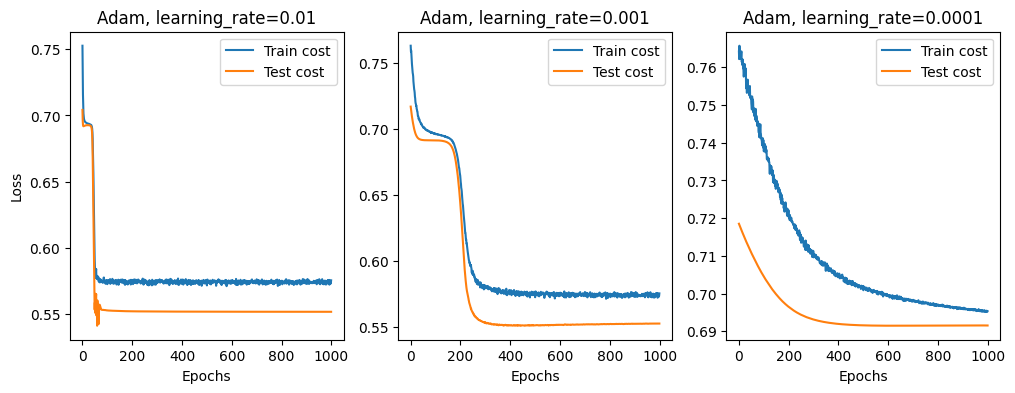

In [ ]:
title_adam1 = "Adam, learning_rate=" + str(learning_rate1)
print(title_adam1)
get_metrics(model_adam1, X_test, y_test)
print("/////////////////////////")

title_adam2 = "Adam, learning_rate=" + str(learning_rate2)
print(title_adam2)
get_metrics(model_adam2, X_test, y_test)
print("/////////////////////////")

title_adam3 = "Adam, learning_rate=" + str(learning_rate3)
print(title_adam3)
get_metrics(model_adam3, X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(train_loss_adam1, test_loss_adam1, title_adam1, axis, 0)
plot_costs(train_loss_adam2, test_loss_adam2, title_adam2, axis, 1)
plot_costs(train_loss_adam3, test_loss_adam3, title_adam3, axis, 2)

plt.show()

In [ ]:
hidden_sizes = [15, 15, 15, 15]
num_epochs = 1000
batch_size = 50
learning_rate1 = 0.01
learning_rate2 = 0.001
learning_rate3 = 0.0001

model_sgd1 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.SGD(model_sgd1.parameters(), lr=learning_rate1)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_sgd1, test_loss_sgd1 = train(model_sgd1, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_sgd2 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.SGD(model_sgd2.parameters(), lr=learning_rate2)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_sgd2, test_loss_sgd2 = train(model_sgd2, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_sgd3 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.SGD(model_sgd3.parameters(), lr=learning_rate3)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_sgd3, test_loss_sgd3 = train(model_sgd3, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)


SGD, learning_rate=0.01
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
SGD, learning_rate=0.001
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
SGD, learning_rate=0.0001
Recall: 1.00
Precision: 0.52
F1: 0.69
Accuracy: 0.52
/////////////////////////


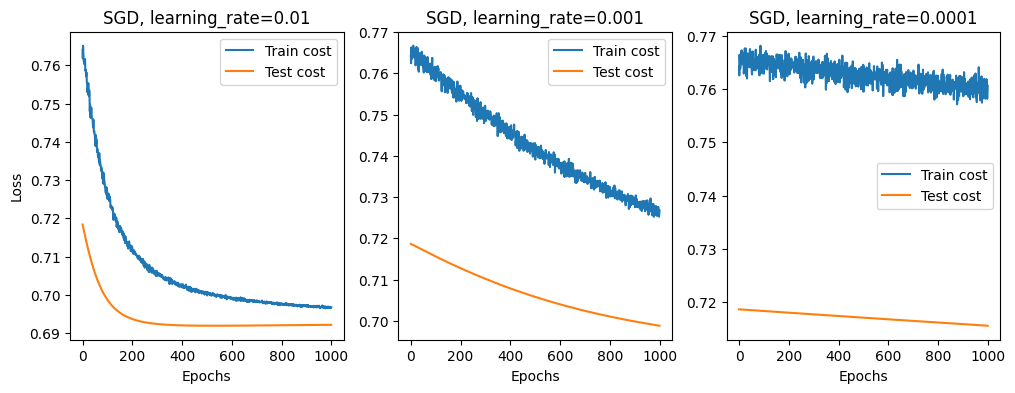

In [ ]:
title_sgd1 = "SGD, learning_rate=" + str(learning_rate1)
print(title_sgd1)
get_metrics(model_sgd1, X_test, y_test)
print("/////////////////////////")

title_sgd2 = "SGD, learning_rate=" + str(learning_rate2)
print(title_sgd2)
get_metrics(model_sgd2, X_test, y_test)
print("/////////////////////////")

title_sgd3 = "SGD, learning_rate=" + str(learning_rate3)
print(title_sgd3)
get_metrics(model_sgd3, X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(train_loss_sgd1, test_loss_sgd1, title_sgd1, axis, 0)
plot_costs(train_loss_sgd2, test_loss_sgd2, title_sgd2, axis, 1)
plot_costs(train_loss_sgd3, test_loss_sgd3, title_sgd3, axis, 2)

plt.show()

In [ ]:
hidden_sizes = [15, 15, 15, 15]
num_epochs = 1000
batch_size = 50
learning_rate1 = 0.01
learning_rate2 = 0.001
learning_rate3 = 0.0001

model_AdaGrad1 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adagrad(model_AdaGrad1.parameters(), lr=learning_rate1)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_AdaGrad1, test_loss_AdaGrad1 = train(model_AdaGrad1, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_AdaGrad2 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adagrad(model_AdaGrad2.parameters(), lr=learning_rate2)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_AdaGrad2, test_loss_AdaGrad2 = train(model_AdaGrad2, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)

model_AdaGrad3 = MLP(X.shape[1], hidden_sizes, 1)
optimizer = optim.Adagrad(model_AdaGrad3.parameters(), lr=learning_rate3)
loss_fn = nn.BCEWithLogitsLoss()
train_loss_AdaGrad3, test_loss_AdaGrad3 = train(model_AdaGrad3, optimizer, loss_fn, num_epochs, batch_size, X_train, y_train, X_test, y_test)


AdaGrad, learning_rate=0.01
Recall: 0.84
Precision: 0.93
F1: 0.89
Accuracy: 0.89
/////////////////////////
AdaGrad, learning_rate=0.001
Recall: 0.00
Precision: 0.00
F1: 0.00
Accuracy: 0.48
/////////////////////////
AdaGrad, learning_rate=0.0001
Recall: 1.00
Precision: 0.52
F1: 0.69
Accuracy: 0.52
/////////////////////////


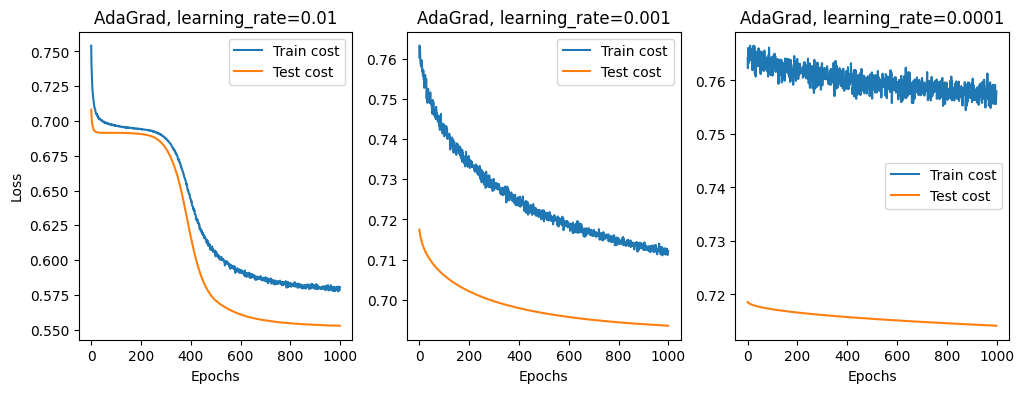

In [ ]:
title_AdaGrad1 = "AdaGrad, learning_rate=" + str(learning_rate1)
print(title_AdaGrad1)
get_metrics(model_AdaGrad1, X_test, y_test)
print("/////////////////////////")

title_AdaGrad2 = "AdaGrad, learning_rate=" + str(learning_rate2)
print(title_AdaGrad2)
get_metrics(model_AdaGrad2, X_test, y_test)
print("/////////////////////////")

title_AdaGrad3 = "AdaGrad, learning_rate=" + str(learning_rate3)
print(title_AdaGrad3)
get_metrics(model_AdaGrad3, X_test, y_test)
print("/////////////////////////")

figure, axis = plt.subplots(1, 3, figsize=(12, 4))

plot_costs(train_loss_AdaGrad1, test_loss_AdaGrad1, title_AdaGrad1, axis, 0)
plot_costs(train_loss_AdaGrad2, test_loss_AdaGrad2, title_AdaGrad2, axis, 1)
plot_costs(train_loss_AdaGrad3, test_loss_AdaGrad3, title_AdaGrad3, axis, 2)

plt.show()